# Imports

In [67]:
import os
import warnings
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Getting the data

In [68]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Advance House Prediction/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Datasets/Advance House Prediction/test.csv')

In [69]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


*  We have 81 columns.
*  Our target variable is SalePrice.

# Exploratory Data Analysis

*pandas_profiling -> Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.*

*EDA IN ONE LINE !*

In [71]:
#prof = pp.ProfileReport(train, title="Pandas Profiling Report")

In [72]:
# prof

In [73]:
# prof.to_file('profile_report.html')

Click [here](https://drive.google.com/file/d/13TDiD7QAc_aaDHUKF7-G_l1DYdjkaZtm/view?usp=sharing) and download this ``.html`` file to view the pandas profiling on this dataset.

### Initialising Train and Target

In [74]:
y = train[['Id','SalePrice']]
train = train.drop('SalePrice',axis=1)

### Concatenating Train and Test datasets vertically.

In [75]:
all_dfs = [train,test]
all_df = pd.concat(all_dfs).reset_index(drop=True);

# Data Preprocessing & Feature Engineering

## Dropping Irrelevant Columns

### These features has more than 40% data missing

In [76]:
all_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],axis=1,inplace=True)

### Dropping Highly Skewed Features

In [77]:
all_df.drop(['MiscVal'],axis=1,inplace=True)

## Filling Null values with specific values (Check data description)

Filled object features with data description specific character and numerical features with the median values.

In [78]:
all_df['LotFrontage'].fillna(value=all_df['LotFrontage'].median(),inplace=True)
all_df['MasVnrType'].fillna(value='None',inplace=True)
all_df['MasVnrArea'].fillna(0,inplace=True)
all_df['BsmtCond'].fillna(value='TA',inplace=True)
all_df['BsmtExposure'].fillna(value='No',inplace=True)
all_df['Electrical'].fillna(value='SBrkr',inplace=True)
all_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
all_df['GarageType'].fillna(value='Attchd',inplace=True)
all_df['GarageYrBlt'].fillna(value=all_df['GarageYrBlt'].median(),inplace=True)
all_df['GarageFinish'].fillna(value='Unf',inplace=True)
all_df['GarageQual'].fillna(value='TA',inplace=True)
all_df['GarageCond'].fillna(value='TA',inplace=True)
all_df['BsmtFinType1'].fillna(value='NO',inplace=True)
all_df['BsmtQual'].fillna(value='No',inplace=True)
all_df['BsmtFullBath'].fillna(value=all_df['BsmtFullBath'].median(),inplace=True)
all_df['BsmtFinSF1'].fillna(value=all_df['BsmtFinSF1'].median(),inplace=True)
all_df['BsmtFinSF2'].fillna(value=0,inplace=True)
all_df['BsmtUnfSF'].fillna(value=0,inplace=True)
all_df['TotalBsmtSF'].fillna(value=all_df['TotalBsmtSF'].median(),inplace=True)
all_df['BsmtHalfBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=all_df['GarageCars'].median(),inplace=True)
all_df['GarageArea'].fillna(value=all_df['GarageArea'].median(),inplace=True)

## Encoding All Object Datatypes with Label Enconding

*Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.*

In [79]:
labelencoder=LabelEncoder()

all_df['MSZoning']      = labelencoder.fit_transform(all_df['MSZoning'].astype(str))
all_df['Exterior1st']   = labelencoder.fit_transform(all_df['Exterior1st'].astype(str))
all_df['Exterior2nd']   = labelencoder.fit_transform(all_df['Exterior2nd'].astype(str))
all_df['KitchenQual']   = labelencoder.fit_transform(all_df['KitchenQual'].astype(str))
all_df['Functional']    = labelencoder.fit_transform(all_df['Functional'].astype(str))
all_df['SaleType']      = labelencoder.fit_transform(all_df['SaleType'].astype(str))
all_df['Street']        = labelencoder.fit_transform(all_df['Street'])   
all_df['LotShape']      = labelencoder.fit_transform(all_df['LotShape'])   
all_df['LandContour']   = labelencoder.fit_transform(all_df['LandContour'])   
all_df['LotConfig']     = labelencoder.fit_transform(all_df['LotConfig'])   
all_df['LandSlope']     = labelencoder.fit_transform(all_df['LandSlope'])   
all_df['Neighborhood']  = labelencoder.fit_transform(all_df['Neighborhood'])   
all_df['Condition1']    = labelencoder.fit_transform(all_df['Condition1'])   
all_df['Condition2']    = labelencoder.fit_transform(all_df['Condition2'])   
all_df['BldgType']      = labelencoder.fit_transform(all_df['BldgType'])   
all_df['HouseStyle']    = labelencoder.fit_transform(all_df['HouseStyle'])   
all_df['RoofStyle']     = labelencoder.fit_transform(all_df['RoofStyle'])   
all_df['RoofMatl']      = labelencoder.fit_transform(all_df['RoofMatl'])    
all_df['MasVnrType']    = labelencoder.fit_transform(all_df['MasVnrType'])   
all_df['ExterQual']     = labelencoder.fit_transform(all_df['ExterQual'])  
all_df['ExterCond']     = labelencoder.fit_transform(all_df['ExterCond'])   
all_df['Foundation']    = labelencoder.fit_transform(all_df['Foundation'])   
all_df['BsmtQual']      = labelencoder.fit_transform(all_df['BsmtQual'])   
all_df['BsmtCond']      = labelencoder.fit_transform(all_df['BsmtCond'])   
all_df['BsmtExposure']  = labelencoder.fit_transform(all_df['BsmtExposure'])   
all_df['BsmtFinType1']  = labelencoder.fit_transform(all_df['BsmtFinType1'])   
all_df['BsmtFinType2']  = labelencoder.fit_transform(all_df['BsmtFinType2'])   
all_df['Heating']       = labelencoder.fit_transform(all_df['Heating'])   
all_df['HeatingQC']     = labelencoder.fit_transform(all_df['HeatingQC'])   
all_df['CentralAir']    = labelencoder.fit_transform(all_df['CentralAir'])   
all_df['Electrical']    = labelencoder.fit_transform(all_df['Electrical'])    
all_df['GarageType']    = labelencoder.fit_transform(all_df['GarageType'])  
all_df['GarageFinish']  = labelencoder.fit_transform(all_df['GarageFinish'])   
all_df['GarageQual']    = labelencoder.fit_transform(all_df['GarageQual'])  
all_df['GarageCond']    = labelencoder.fit_transform(all_df['GarageCond'])   
all_df['PavedDrive']    = labelencoder.fit_transform(all_df['PavedDrive'])  
all_df['SaleCondition'] = labelencoder.fit_transform(all_df['SaleCondition'])  

## Scaling the dataset to use Linear Models

*Standard Scalar: Standardize features by removing the mean and scaling to unit variance*
*The standard score of a sample x is calculated as:*

    z = (x - u) / s

*where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.*

In [80]:
Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))

train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled = pd.DataFrame(all_scaled[1460:2920])

# Modeling

## Train - Test split !

In [81]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

## XGBoost

In [82]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

[15:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.001, reg_lambda=1e-06, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## LightGBM

In [83]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Scores of the Models

In [84]:
print ("XGB Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))
print ("LGBM Training score:",LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

XGB Training score: 0.9878279610571612 Test Score: 0.9307079348964713
LGBM Training score: 0.9999557727264998 Test Score: 0.9101390980189892


## Mixing 50% + 50% of Both the Models to get an Optimum Model.

In [85]:
y_pred_xgb  = pd.DataFrame( XGB.predict(test_scaled))
y_pred_lgbm = pd.DataFrame(LGBM.predict(test_scaled))

y_pred=pd.DataFrame()
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

# Submission

In [86]:
y_pred.to_csv('submission.csv',index=False)

## Some Regression Visuals to help us understand the current state!

In [87]:
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import ValidationCurve

*Prediction Error Plot*

*A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.*

0.8495325341916766

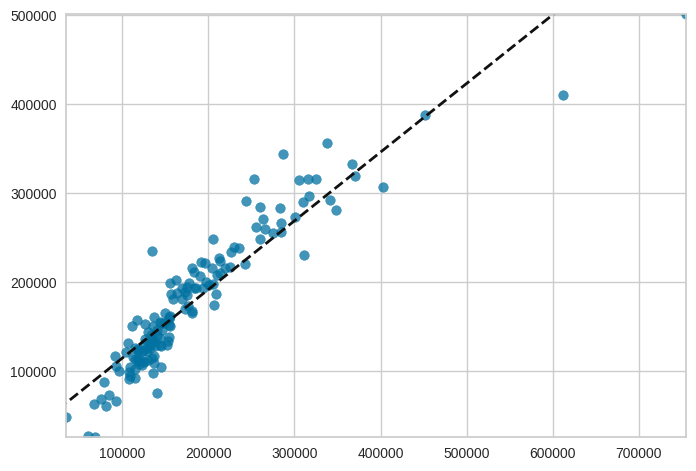

In [89]:
model = Lasso(alpha=10)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)

You can find additional information of Yellowbricks  through its website: https://www.scikit-yb.org/en/latest/

# Thanks A Lot For Your Time ! Please Upvote if you Like it.

<p align="center">
  <img width="460" height="300" src="https://media.giphy.com/media/CHmwA02GQ6aTS/giphy.gif">
</p>